# The Diabetes prediction

link in keggel: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

1. Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.
2. Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.
3. Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated.
4. Heart disease is another medical condition that is associated with an increased risk of developing diabetes.
5. Smoking history is also considered a risk factor for diabetes and can exacerbate the complications.
6. BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk.
7. HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.
8. Blood glucose level: refers to the amount of glucose in the bloodstream at a given time.
9. Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes.

In [1]:
# Load libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Import dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Data exploratory analysis

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


The dataset doesn't have any null values

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


<Axes: xlabel='diabetes', ylabel='count'>

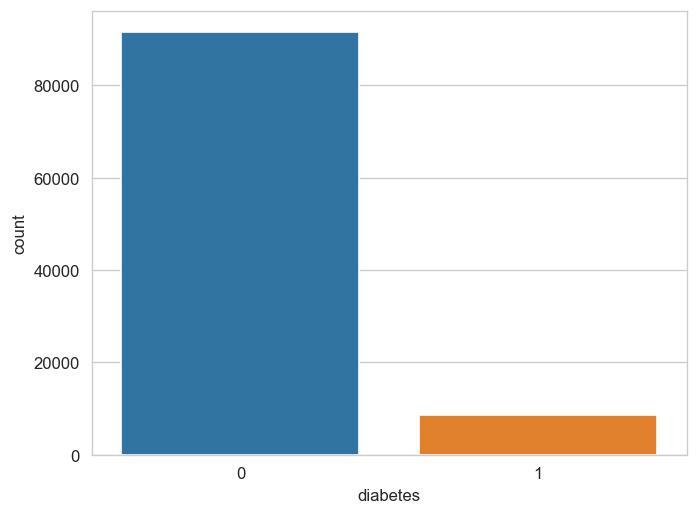

In [6]:
plt.figure(dpi=120)
sns.set_style(style="whitegrid")
sns.countplot(data=df, x="diabetes")

The dataset is strongly unbalanced. Class weights, Tomek links, or SMOTE can be used to address this issue

In [7]:
# Persentage of diabetes cases from all dataset
len(df[df["diabetes"] == 1]["diabetes"]) / (len(df[df["diabetes"] == 1]["diabetes"]) + len(df[df["diabetes"] == 0]["diabetes"])) * 100

8.5

In [8]:
# Remove gender "Other"
df = df.drop((df[df['gender'] == "Other"]).index, axis=0)

<Axes: xlabel='gender', ylabel='count'>

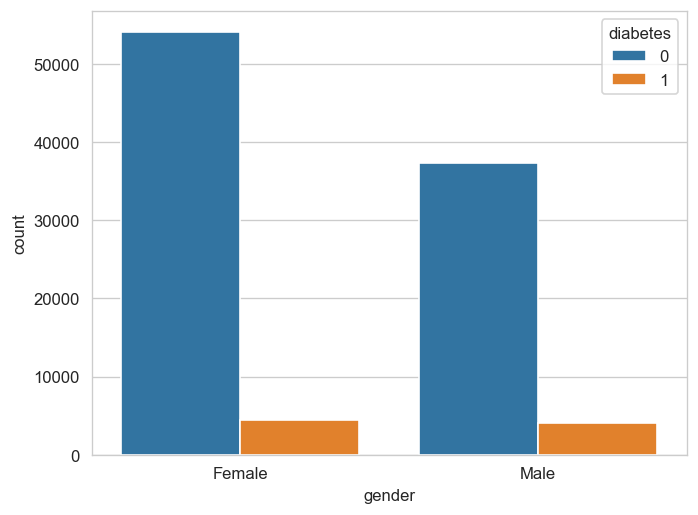

In [9]:
plt.figure(dpi=120)
sns.countplot(data=df, x='gender', hue="diabetes")

<Axes: xlabel='age', ylabel='Count'>

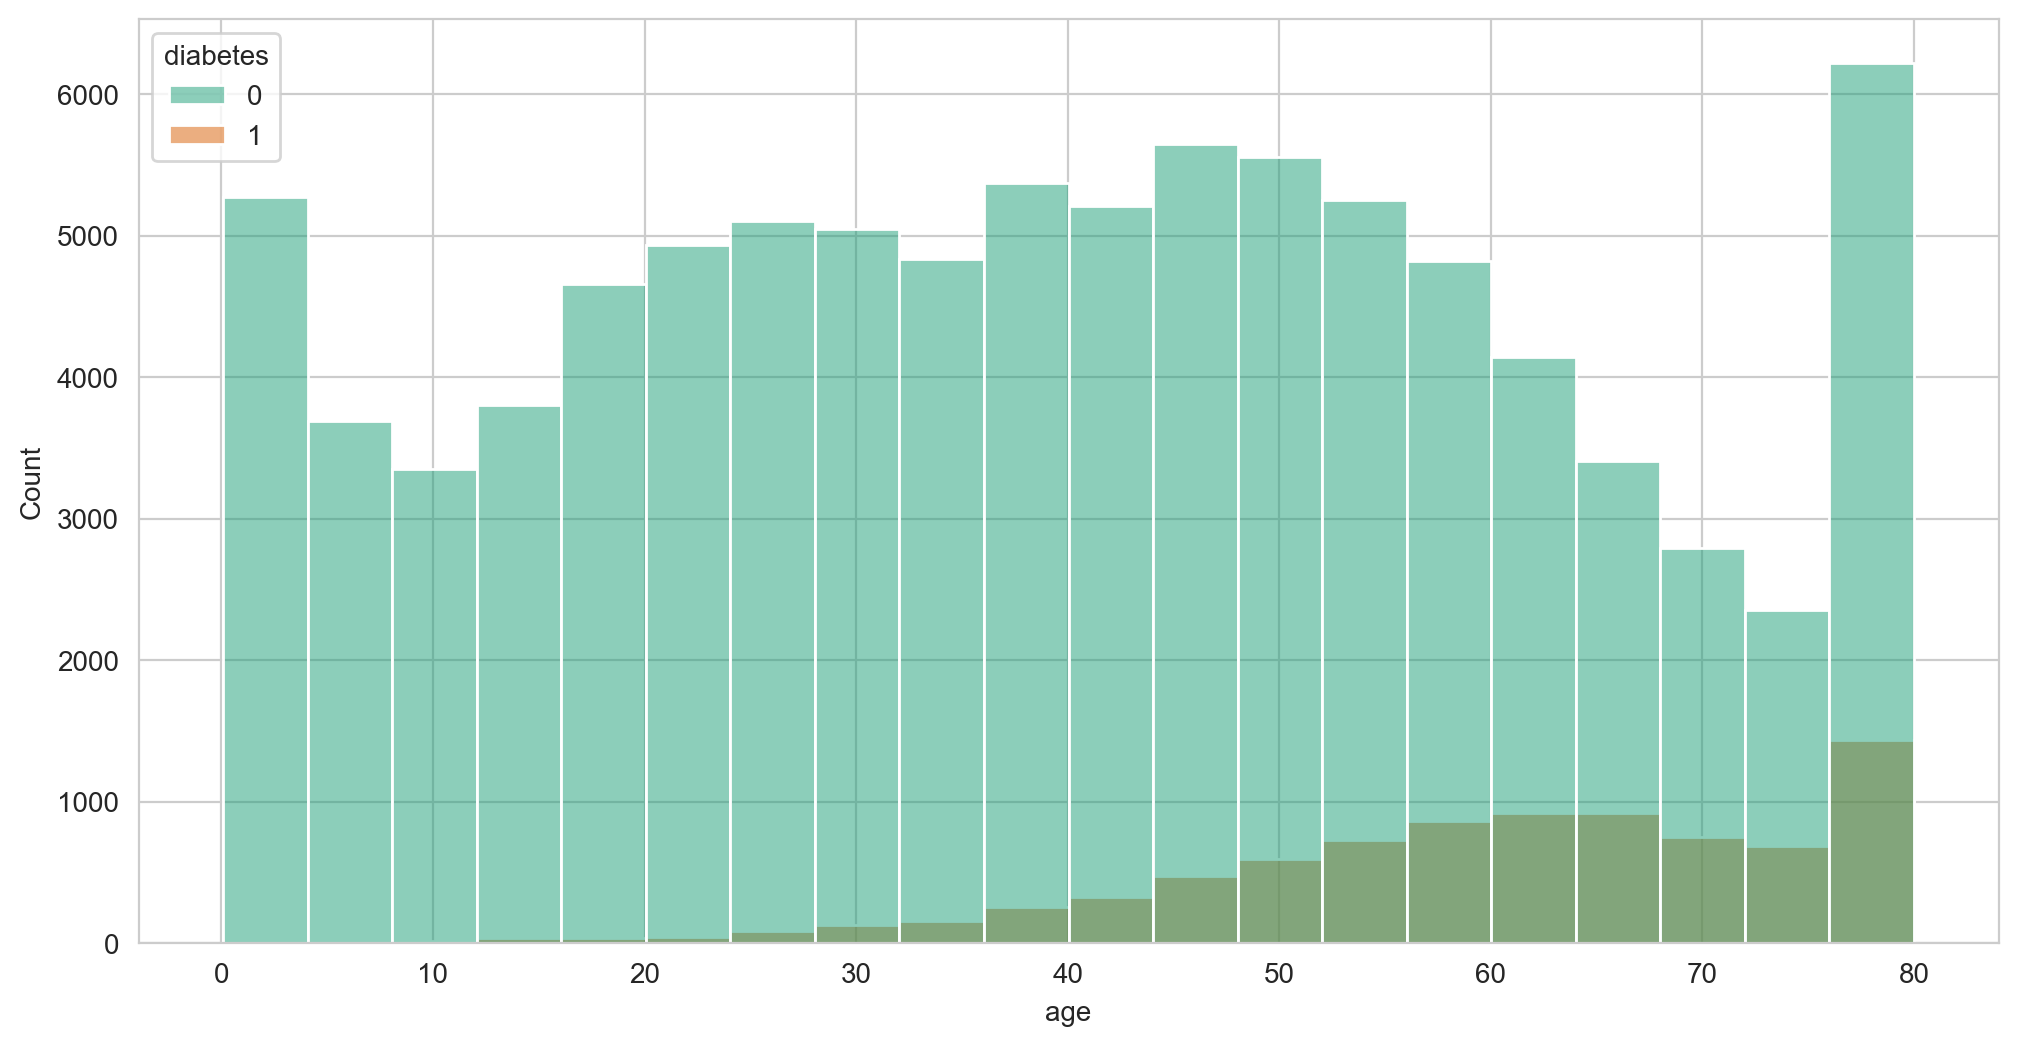

In [10]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='age', hue="diabetes", bins=20, palette="Dark2")

<Axes: xlabel='hypertension', ylabel='count'>

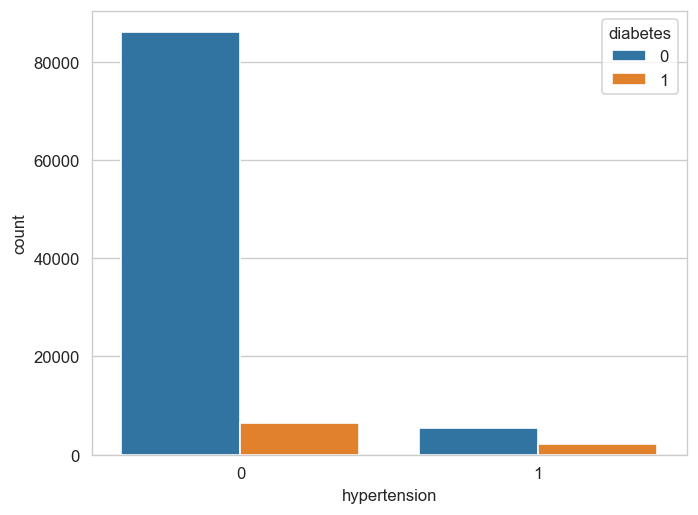

In [11]:
plt.figure(dpi=120)
sns.countplot(data=df, x='hypertension', hue="diabetes")

<Axes: xlabel='heart_disease', ylabel='count'>

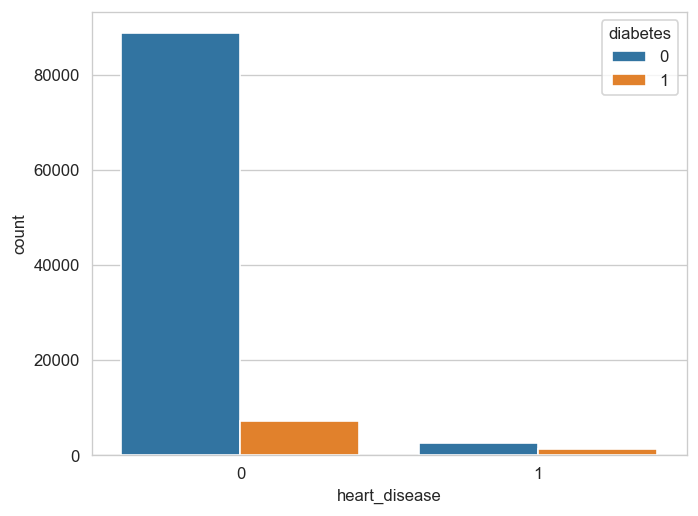

In [12]:
plt.figure(dpi=120)
sns.countplot(data=df, x='heart_disease', hue="diabetes")

<Axes: xlabel='smoking_history', ylabel='count'>

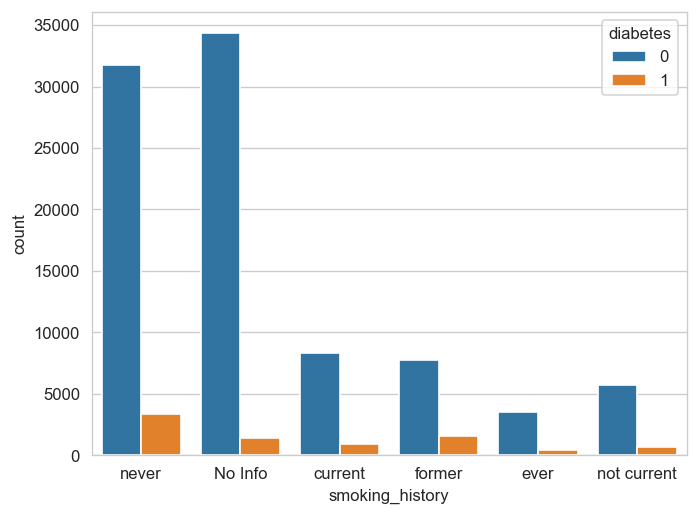

In [13]:
plt.figure(dpi=120)
sns.countplot(data=df, x='smoking_history', hue="diabetes")

In [14]:
# Calculate percentage of diabetes case grooped by smoking history
smoking_prop = ((df[df["diabetes"]==1].groupby("smoking_history")["diabetes"].value_counts().values) / (df[df["diabetes"]==1].groupby("smoking_history")["diabetes"].value_counts().values + df[df["diabetes"]==0].groupby("smoking_history")["diabetes"].value_counts().values) ) * 100
indexes = df[df["diabetes"]==0].groupby("smoking_history")["diabetes"].value_counts().index.get_level_values("smoking_history")
smoking_prop_df = pd.DataFrame(data=smoking_prop, index=indexes, columns=["%"])

In [15]:
smoking_prop_df

,%
smoking_history,
No Info,4.060318
current,10.208917
ever,11.791157
former,17.001711
never,9.534937
not current,10.715950


People with smoking history labeled as 'No Info' tend to have the lowest diabetes rate. So, it's reasonable to reassign all rows with 'No Info' in smoking history to the value 'never'

In [16]:
df.loc[df["smoking_history"] == "No Info", "smoking_history"] = "never"
df["smoking_history"].unique()

array(['never', 'current', 'former', 'ever', 'not current'], dtype=object)

<Axes: xlabel='diabetes', ylabel='bmi'>

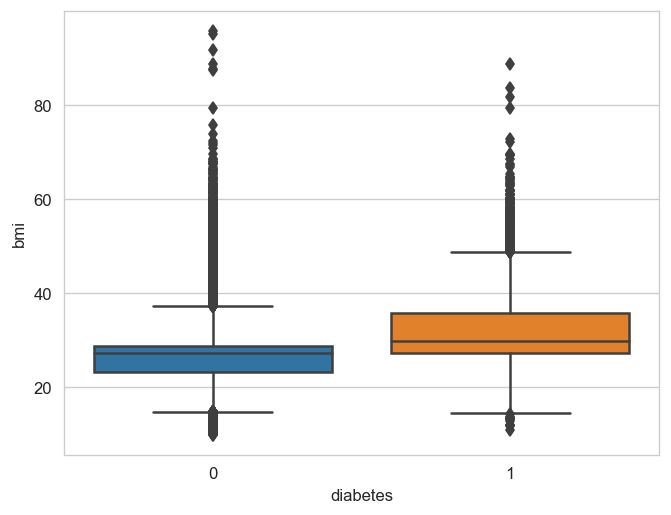

In [17]:
plt.figure(dpi=120)
sns.boxplot(data=df, x="diabetes", y="bmi")

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

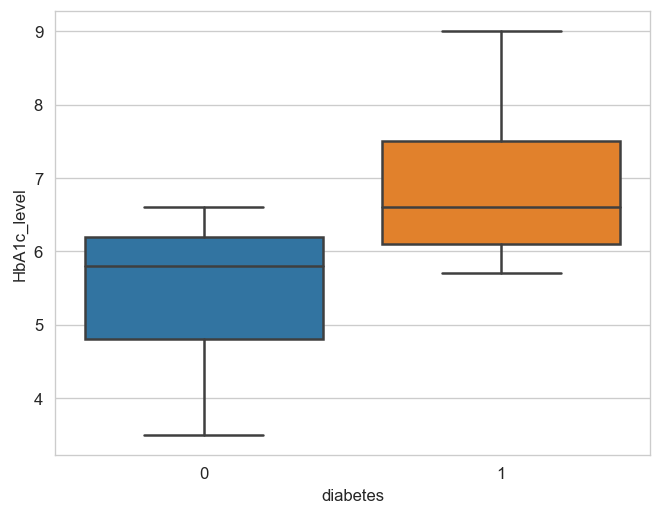

In [18]:
plt.figure(dpi=120)
sns.boxplot(data=df, x="diabetes", y="HbA1c_level")

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

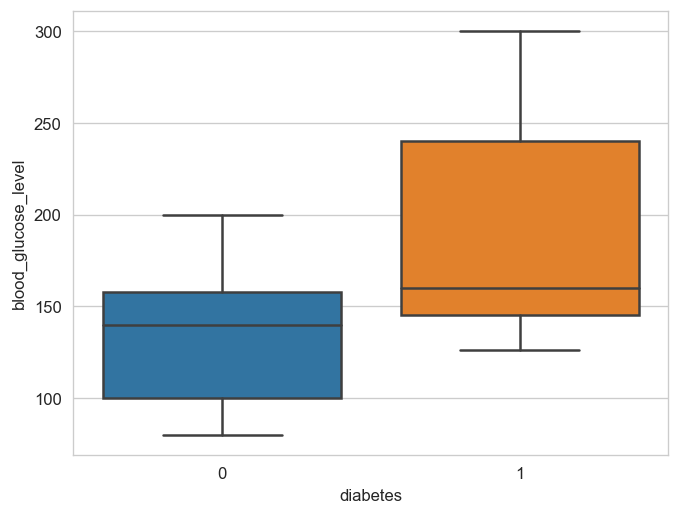

In [19]:
plt.figure(dpi=120)
sns.boxplot(data=df,x="diabetes", y="blood_glucose_level")

In [20]:
# Create dummy variables from a string-type column's data
df_numeric = pd.get_dummies(df, drop_first=True, dtype=int)

In [21]:
df_numeric.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0


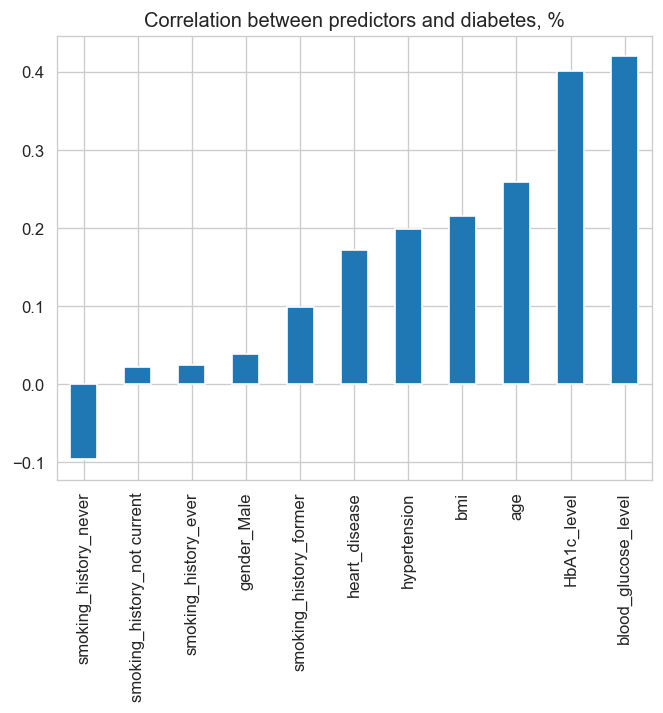

In [22]:
plt.figure(dpi=120)
df_numeric.corr()["diabetes"].sort_values()[:-1].plot(kind="bar")
plt.title("Correlation between predictors and diabetes, %");

<Axes: >

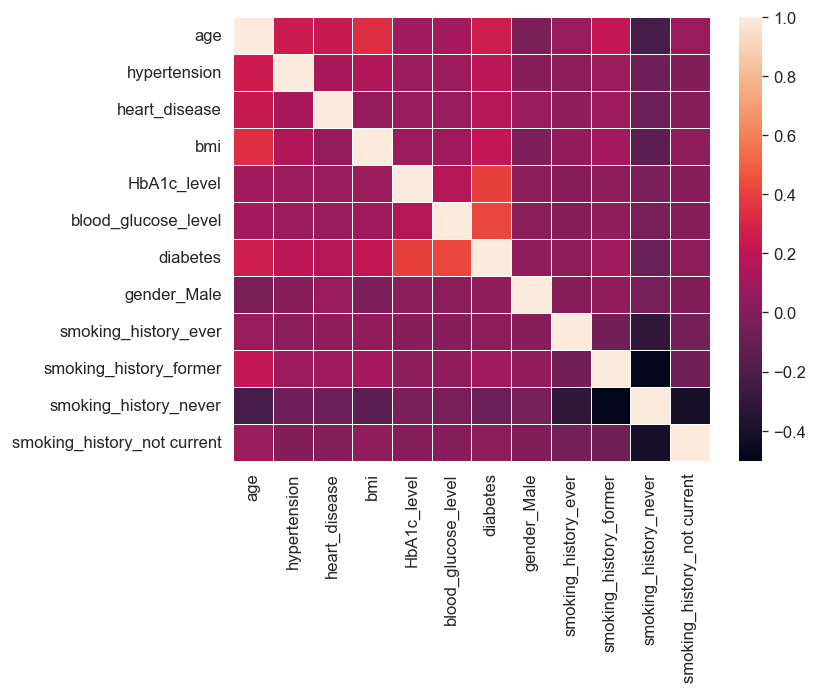

In [23]:
# Create correlation heatmap
plt.figure(dpi=120)
sns.heatmap(df_numeric.corr(), linewidths=0.5, linecolor="white")

# Machine learning

In [24]:
# Import libraries and classes for machine learning data processing, metrics evaluation, and visualization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, RocCurveDisplay
from sklearn.metrics import auc, precision_recall_curve

import joblib

In [25]:
def model_summary(model, X_test, y_test):
    '''
    This function returns classification_report, confusion matrix, ROC
    and Precision-Recall curve for a given prediction model.
    
    Args:
        model: Model for which the summary will be computed.
        X_test: Features of the model.
        y_test: Target variable.

    Returns:
        None
    '''
    # Receive predictions and display classification_report + confusion matrix
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["no diabetes", "diabetes is present"])
    sns.set_style(style="white")
    disp.plot()
    
    # Receive probability of predictions
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    sns.set_style(style="whitegrid")
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
    roc_display.plot()
    plt.legend([f'AUC = {roc_auc:.3f}'], loc=(0.6, 0.1))
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Precision-Recall Curve
    prec, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, prec)
    plt.figure()
    plt.plot(recall, prec, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

This function is used to unify performance metrics between different classification models

In [26]:
X = df_numeric.drop("diabetes", axis=1)
y = df_numeric["diabetes"]

In [27]:
# Perform train-test split for cross-validation and hold-out test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Logistic regression model

In [28]:
log_model = make_pipeline(StandardScaler(), PolynomialFeatures(), LogisticRegression(max_iter=100000))

# Create paramgrid dictionary for grid search
penalty= ["l2"]
degree = [1, 2, 3]
class_weight = ["balanced"]
C = np.logspace(np.log10(0.00001), np.log10(0.001), 11)


param_grid = {"polynomialfeatures__degree":degree,
              "logisticregression__penalty":penalty,
              "logisticregression__class_weight":class_weight,
              "logisticregression__C":C}

In [29]:
log_model_grid = GridSearchCV(log_model, 
                              param_grid=param_grid, 
                              cv=5, 
                              verbose=2, 
                              n_jobs=-1, 
                              scoring="f1")

In [30]:
log_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=100000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.00000000e-05, 1.58489319e-05, 2.51188643e-05, 3.98107171e-05,
       6.30957344e-05, 1.00000000e-04, 1.58489319e-04, 2.51188643e-04,
       3.98107171e-04, 6.30957344e-04, 1.00000000e-03]),
                         'logisticregression__class_weight': ['balanced'],
                         'logisticregression__penalty': ['l2'],
                         'polynomialfeatures__degree': [1, 2, 3]},
             scoring='f1', verbose=2)

In [31]:
log_model_grid.best_params_

{'logisticregression__C': 1e-05,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l2',
 'polynomialfeatures__degree': 3}

In [32]:
# Receive the best model from grid search
log_model_final = log_model_grid.best_estimator_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9108
           1       0.56      0.80      0.66       891

    accuracy                           0.93      9999
   macro avg       0.77      0.87      0.81      9999
weighted avg       0.94      0.93      0.93      9999



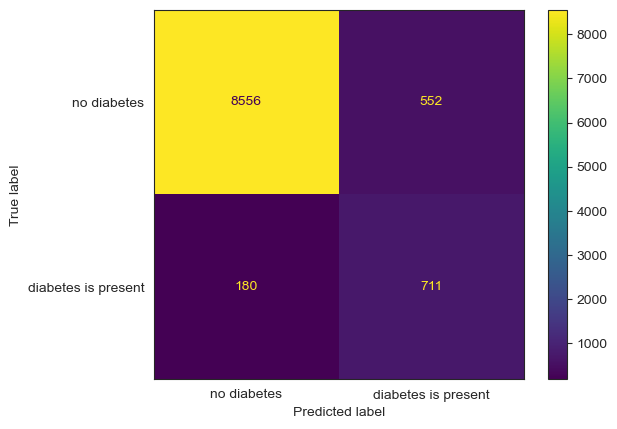

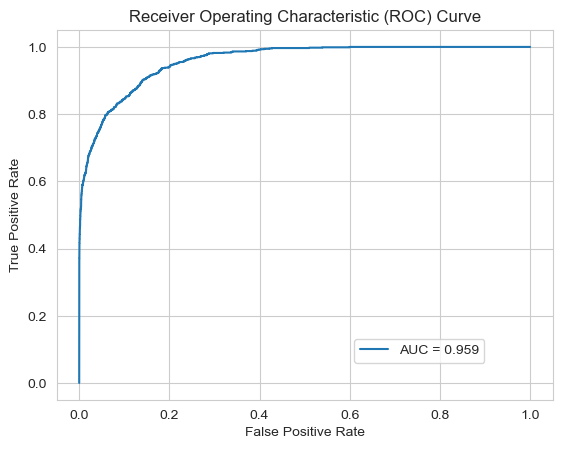

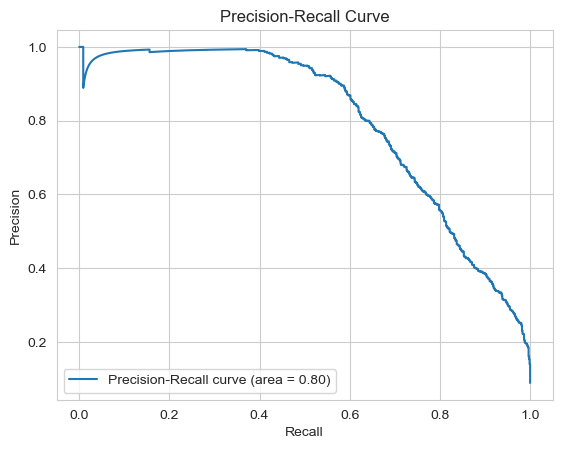

In [33]:
model_summary(log_model_final, X_test, y_test)

In [34]:
# Train the final model on all data
log_model_final.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('logisticregression',
                 LogisticRegression(C=1e-05, class_weight='balanced',
                                    max_iter=100000))])

In [35]:
# Uncomment this cell to save the model
# joblib.dump(log_model_final, "logistic_model.pkl")

# Random forest model

In [36]:
random_forest_model = RandomForestClassifier(random_state=42)

# Create paramgrid dictionary for grid search
n_estimators = [64, 100, 124, 150, 200, 256, 300]
criterion = ["gini", "entropy"]
class_weight = ["balanced"]


param_grid_random_forest = {"n_estimators":n_estimators,
                            "criterion":criterion,
                            "class_weight":class_weight}

In [37]:
random_forest_model_grid = GridSearchCV(random_forest_model, 
                                        param_grid=param_grid_random_forest, 
                                        cv=5, 
                                        verbose=2, 
                                        n_jobs=-1,
                                        scoring="f1")

In [38]:
random_forest_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [64, 100, 124, 150, 200, 256, 300]},
             scoring='f1', verbose=2)

In [39]:
random_forest_model_grid.best_params_

{'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 124}

In [40]:
# Receive the best model from grid search
random_forest_model_final = random_forest_model_grid.best_estimator_

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9108
           1       0.92      0.68      0.78       891

    accuracy                           0.97      9999
   macro avg       0.95      0.84      0.88      9999
weighted avg       0.97      0.97      0.96      9999



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


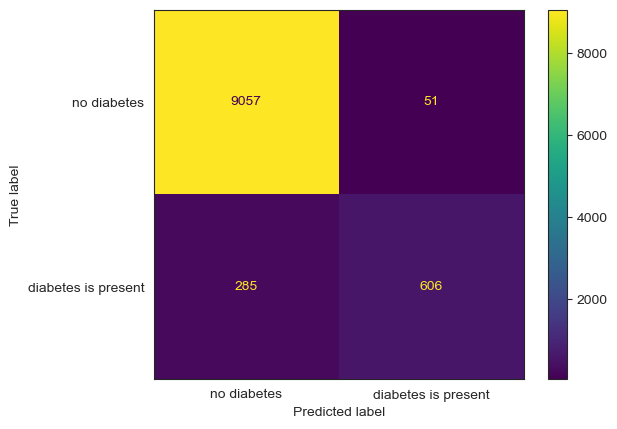

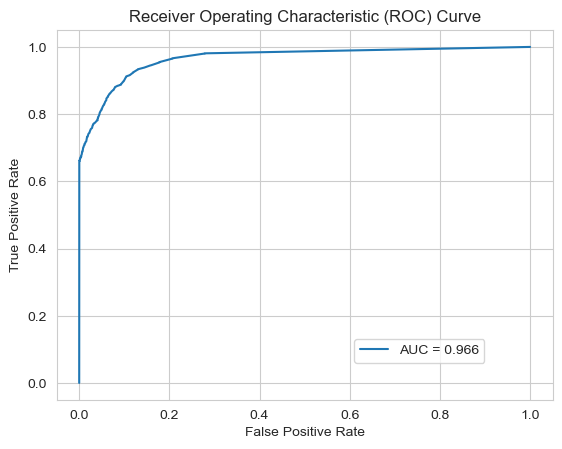

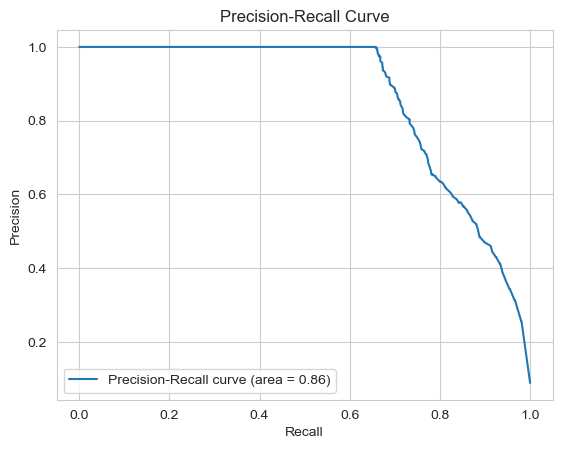

In [41]:
model_summary(random_forest_model_final, X_test, y_test)

In [42]:
# Train the final model on all data
random_forest_model_final.fit(X, y)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=124, random_state=42)

In [43]:
# Uncomment this cell to save the model
# joblib.dump(random_forest_model_final, "random_forest_model.pkl")

# AdaBoost model

In [44]:
ada_model = AdaBoostClassifier()

# Create paramgrid dictionary for grid search
n_estimators = [256, 300, 400]
learning_rate = [0.5, 1.0, 2.0, 4.0]

param_grid_ada = {"n_estimators":n_estimators,
                  "learning_rate":learning_rate}

In [45]:
ada_model_grid = GridSearchCV(ada_model,
                              param_grid=param_grid_ada,
                              cv=5,
                              verbose=2,
                              n_jobs=-1,
                              scoring="f1")

In [46]:
ada_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.0, 2.0, 4.0],
                         'n_estimators': [256, 300, 400]},
             scoring='f1', verbose=2)

In [47]:
ada_model_grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 300}

In [48]:
ada_model_final = ada_model_grid.best_estimator_

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9108
           1       0.98      0.67      0.80       891

    accuracy                           0.97      9999
   macro avg       0.98      0.84      0.89      9999
weighted avg       0.97      0.97      0.97      9999



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


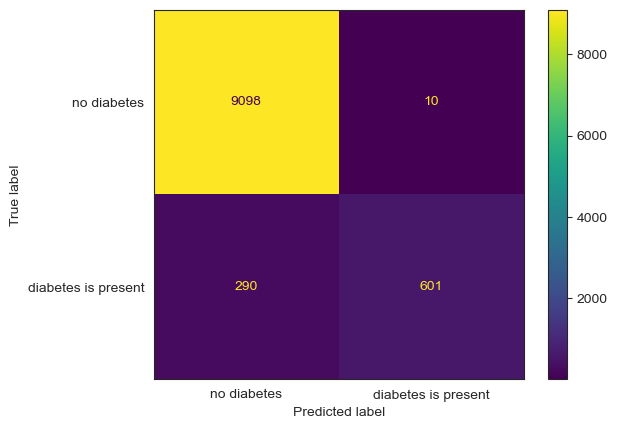

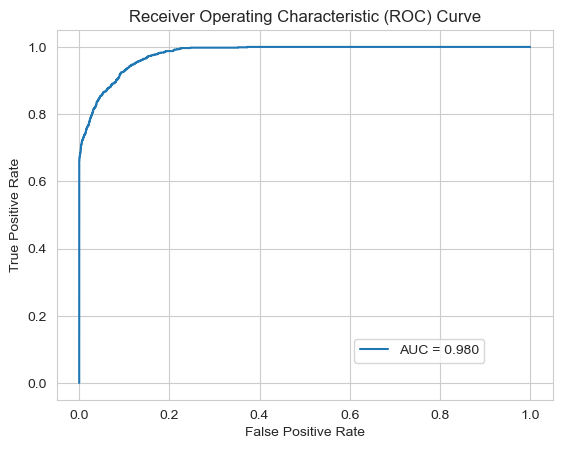

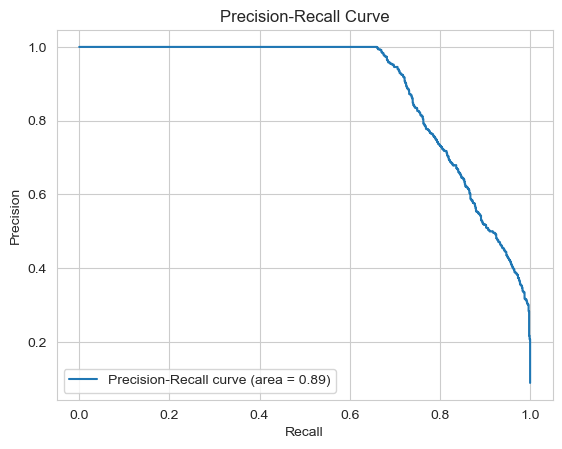

In [49]:
model_summary(ada_model_final, X_test, y_test)

In [50]:
# Train the final model on all data
ada_model_final.fit(X, y)

AdaBoostClassifier(n_estimators=300)

In [51]:
# Uncomment this cell to save the model
# joblib.dump(ada_model_final, "ada_model.pkl")

# K-nearest neighbors model

In [52]:
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Create paramgrid dictionary for grid search
n_neighbors = list(range(3, 15))
weights = ["uniform", "distance"]

param_grid_knn = {"kneighborsclassifier__n_neighbors":n_neighbors,
                  "kneighborsclassifier__weights":weights}

In [53]:
knn_model_grid = GridSearchCV(knn_model,
                              param_grid=param_grid_knn,
                              cv=5,
                              verbose=2,
                              n_jobs=-1,
                              scoring="f1")

In [54]:
knn_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [3, 4, 5, 6, 7, 8,
                                                               9, 10, 11, 12,
                                                               13, 14],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='f1', verbose=2)

In [55]:
knn_model_grid.best_params_

{'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__weights': 'uniform'}

In [56]:
# Receive the best model from grid search
knn_model_final = knn_model_grid.best_estimator_

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      9108
           1       0.89      0.60      0.72       891

    accuracy                           0.96      9999
   macro avg       0.93      0.80      0.85      9999
weighted avg       0.96      0.96      0.95      9999



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


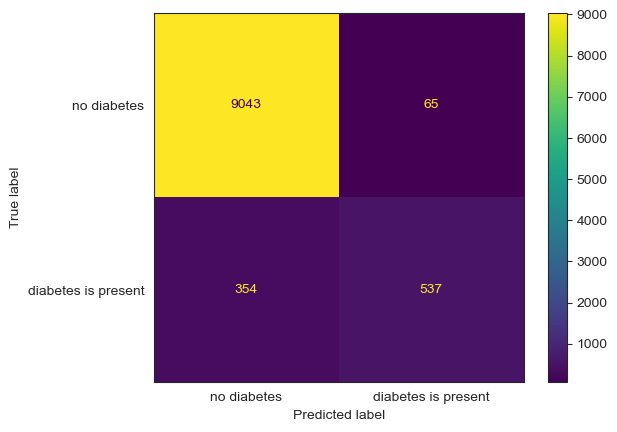

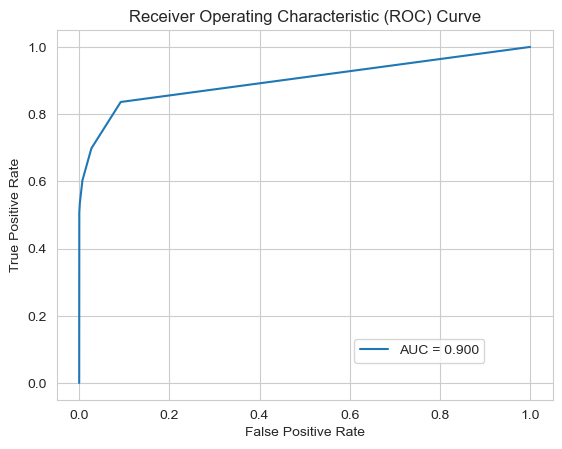

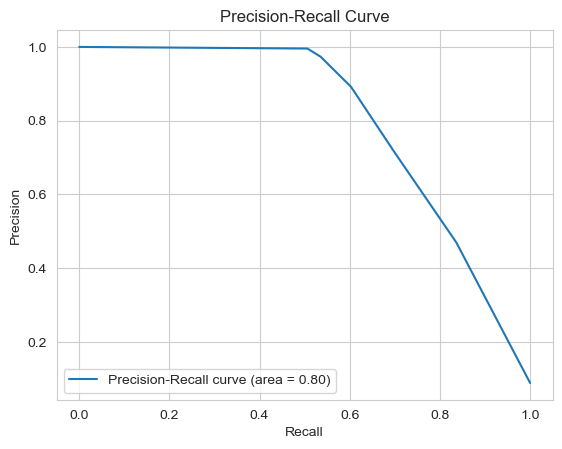

In [57]:
model_summary(knn_model_final, X_test, y_test)

The KNN ROC isn't looks so smooth due to a small (5) number of neighbors that was chosen by grid search

In [58]:
# Train the final model on all data
knn_model_final.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [59]:
# Uncomment this cell to save the model
# joblib.dump(knn_model_final, "knn_model.pkl")